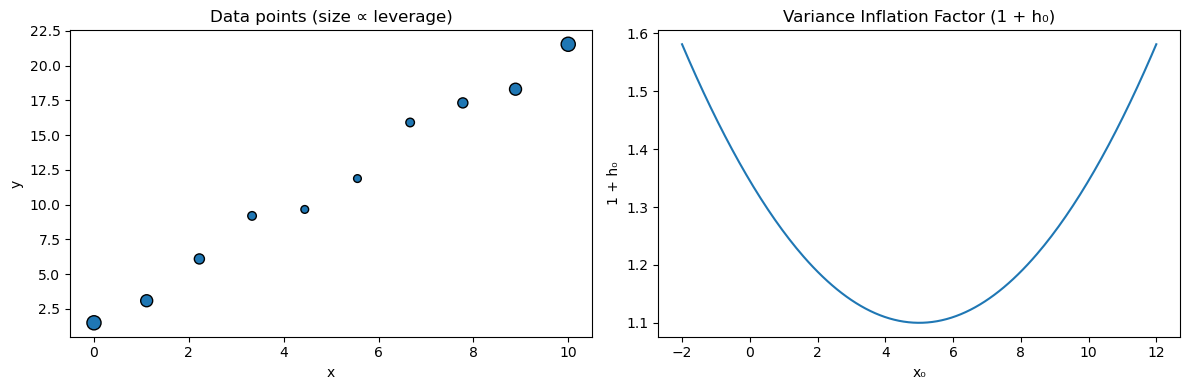

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 1D regression data
np.random.seed(42)
x = np.linspace(0, 10, 10)
y = 2 * x + 1 + np.random.normal(0, 1, size=x.shape)

# Design matrix with intercept
X = np.vstack([np.ones_like(x), x]).T
# Compute hat matrix H = X (X'X)^-1 X'
H = X @ np.linalg.inv(X.T @ X) @ X.T
leverage = np.diag(H)

# Grid for new x0 values
x0_grid = np.linspace(-2, 12, 200)
X0 = np.vstack([np.ones_like(x0_grid), x0_grid]).T
h0_grid = np.sum(X0 @ np.linalg.inv(X.T @ X) * X0, axis=1)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Scatter of original points with marker size ∝ leverage
axes[0].scatter(x, y, s=leverage * 300, edgecolors='k')
axes[0].set_title('Data points (size ∝ leverage)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

# Plot variance inflation factor 1 + h0
axes[1].plot(x0_grid, 1 + h0_grid)
axes[1].set_title('Variance Inflation Factor (1 + h₀)')
axes[1].set_xlabel('x₀')
axes[1].set_ylabel('1 + h₀')

plt.tight_layout()
plt.show()

## Leverage & Prediction-Error Variance

1. **Hat values (leverage) of training points**

   * **Left panel**: each point $(x_i,y_i)$ is sized by its leverage $h_{ii}$.
   * Points near the **center** of your $x$-range have low leverage (small dots).
   * Points at the **ends** of the range have high leverage (large dots): they “pull” the fitted line more if you were to tweak them.

2. **Variance Inflation Factor $\,1 + h_0$**

   * **Right panel**: plots how the factor $(1 + h_0)$ grows as a function of a new input $x_0$.
   * Near the bulk of your data, $h_0\approx0$, so $1+h_0\approx1$ → your prediction variance ≈ $\sigma^2$.
   * Far from the data, $h_0$ rises, so $1+h_0>1$ → your prediction variance $\sigma^2(1+h_0)$ balloons.

3. **Putting it together**

   * **Total variance of prediction error** at $x_0$ is

     $$
       \mathrm{Var}(y_0 - \hat y_0) \;=\;\sigma^2\,(1 + h_0).
     $$
   * **“1”** = irreducible noise (you can’t beat Nature’s randomness).
   * **“$h_0$”** = extra uncertainty because you’re predicting in a territory under-sampled by your training data.

---

**Key takeaway**:

> Predictions at the edges of your $x$-range carry more uncertainty—your confidence bands should be wider there.

This succinctly captures both the leverage concept (how much each training point influences the fit) and its effect on the width of your regression confidence intervals.
